In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('Heart.csv')

In [ ]:
print(df.head())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [ ]:
label_encoder = LabelEncoder()
df['AHD'] = label_encoder.fit_transform(df['AHD'])

In [ ]:
label_encoder = LabelEncoder()
df['Thal'] = label_encoder.fit_transform(df['Thal'])

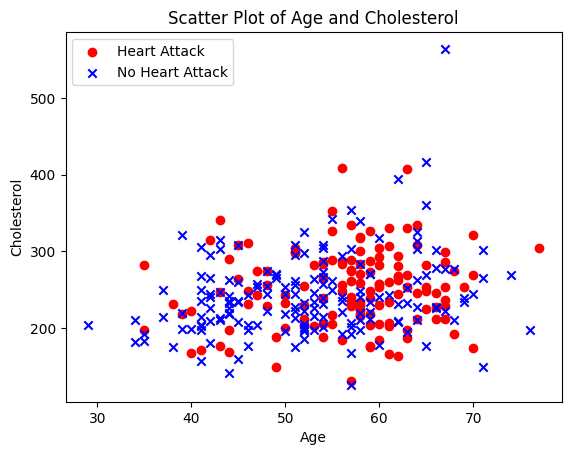

In [ ]:
plt.scatter(df[df['AHD'] == 1]['Age'], df[df['AHD'] == 1]['Chol'], label='Heart Attack', marker='o', color='red')
plt.scatter(df[df['AHD'] == 0]['Age'], df[df['AHD'] == 0]['Chol'], label='No Heart Attack', marker='x', color='blue')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.title('Scatter Plot of Age and Cholesterol')
plt.show()

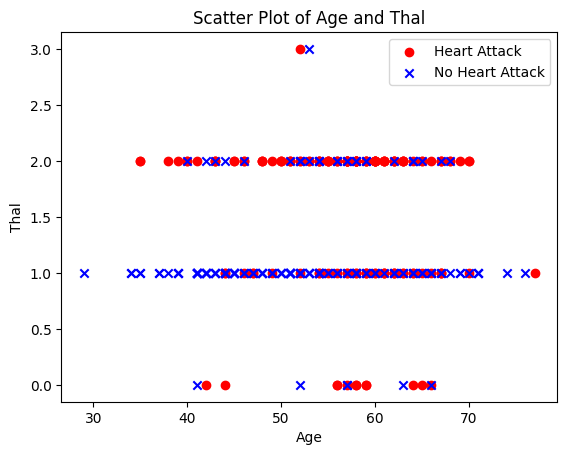

In [ ]:
plt.scatter(df[df['AHD'] == 1]['Age'], df[df['AHD'] == 1]['Thal'], label='Heart Attack', marker='o', color='red')
plt.scatter(df[df['AHD'] == 0]['Age'], df[df['AHD'] == 0]['Thal'], label='No Heart Attack', marker='x', color='blue')
plt.xlabel('Age')
plt.ylabel('Thal')
plt.legend()
plt.title('Scatter Plot of Age and Thal')
plt.show()

In [ ]:
X = df[['Age', 'Chol']].values
y = df['AHD'].values

In [ ]:
X, y

(array([[ 63, 233],
        [ 67, 286],
        [ 67, 229],
        [ 37, 250],
        [ 41, 204],
        [ 56, 236],
        [ 62, 268],
        [ 57, 354],
        [ 63, 254],
        [ 53, 203],
        [ 57, 192],
        [ 56, 294],
        [ 56, 256],
        [ 44, 263],
        [ 52, 199],
        [ 57, 168],
        [ 48, 229],
        [ 54, 239],
        [ 48, 275],
        [ 49, 266],
        [ 64, 211],
        [ 58, 283],
        [ 58, 284],
        [ 58, 224],
        [ 60, 206],
        [ 50, 219],
        [ 58, 340],
        [ 66, 226],
        [ 43, 247],
        [ 40, 167],
        [ 69, 239],
        [ 60, 230],
        [ 64, 335],
        [ 59, 234],
        [ 44, 233],
        [ 42, 226],
        [ 43, 177],
        [ 57, 276],
        [ 55, 353],
        [ 61, 243],
        [ 65, 225],
        [ 40, 199],
        [ 71, 302],
        [ 59, 212],
        [ 61, 330],
        [ 58, 230],
        [ 51, 175],
        [ 50, 243],
        [ 65, 417],
        [ 53, 197],


In [ ]:
split_ratio = 0.75
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
def standardize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_train = standardize_data(X_train)
X_test = standardize_data(X_test)

In [ ]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.n_iterations):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)

            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return np.where(predictions >= 0.5, 1, 0)




In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (227, 2)
y_train shape: (227,)


In [ ]:
lr_model = LogisticRegressionGD(learning_rate=0.01, n_iterations=20000)
lr_model.fit(X_train, y_train)

In [ ]:
print("Unique values of 'output' after encoding:", np.unique(y))

Unique values of 'output' after encoding: [0 1]


In [ ]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

Text(0, 0.5, 'Cholesterol')

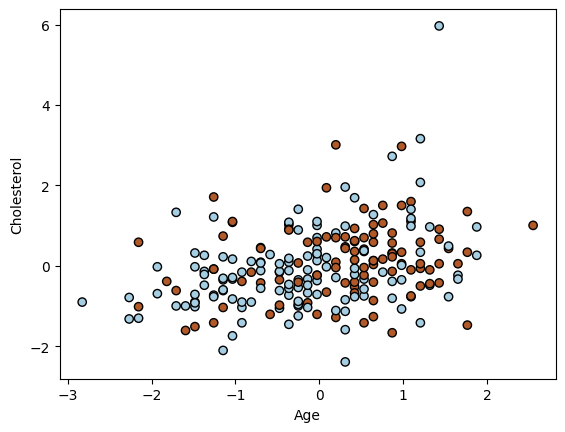

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

In [ ]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

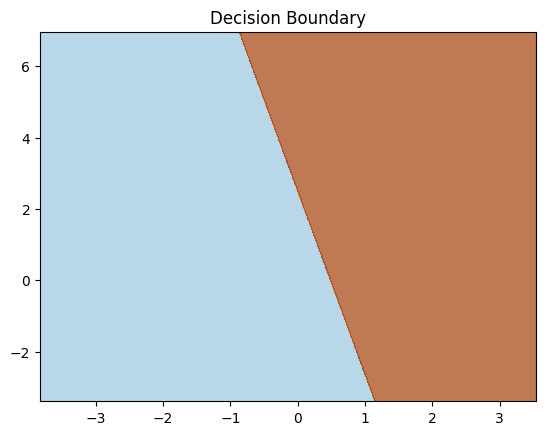

In [ ]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.title('Decision Boundary')
plt.show()

In [ ]:
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.64
Test Accuracy: 0.49
